Author : Teddy Lioner
24 July 2020

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os,shutil
from sklearn.model_selection import train_test_split

In [2]:
#fetch dataset from server
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-24 11:47:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.58MB/s    in 44s     

2020-07-24 11:47:48 (7.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#unzip dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#prepare directory of train and validation
base_dir = '/tmp/rockpaperscissors'

#path to dataset
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#path to train and validation directory
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(validation_dir)

train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)
val_rock = os.path.join(validation_dir, 'rock')
os.mkdir(val_rock)
val_paper = os.path.join(validation_dir, 'paper')
os.mkdir(val_paper)
val_scissors = os.path.join(validation_dir, 'scissors')
os.mkdir(val_scissors)

In [5]:
#split dataset train and validation (validation 40% of dataset)
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [6]:
#copy dataset to train and validation directory
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))

for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper, file))
  
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(val_scissors, file))

In [7]:
#augmentation and generate image data
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [9]:
#make seq model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #activation mode for more than two type of data
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Nadam(),
              metrics=['accuracy'])

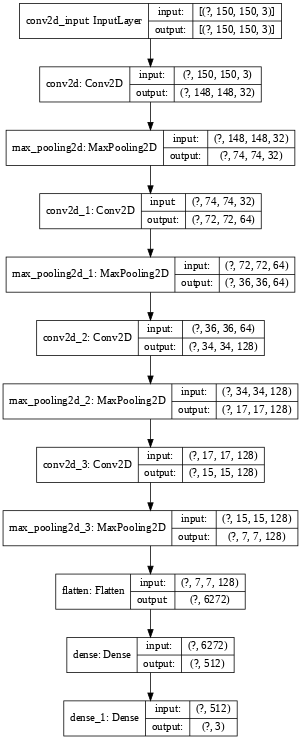

In [11]:
#visualize model
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8, #25% of batch size
      epochs=40, #1312 train data and 32 batch size... so it will be completed in 40 iteration
      validation_data=validation_generator,
      validation_steps=4,
      verbose=1)

Epoch 1/40
8/8 [==============================] - 29s 4s/step - loss: 1.1432 - accuracy: 0.3594 - val_loss: 1.0402 - val_accuracy: 0.7539
Epoch 2/40
8/8 [==============================] - 29s 4s/step - loss: 1.1711 - accuracy: 0.5703 - val_loss: 0.8161 - val_accuracy: 0.7891
Epoch 3/40
8/8 [==============================] - 28s 4s/step - loss: 1.2579 - accuracy: 0.5479 - val_loss: 1.1122 - val_accuracy: 0.3594
Epoch 4/40
8/8 [==============================] - 28s 4s/step - loss: 0.8812 - accuracy: 0.6523 - val_loss: 0.5899 - val_accuracy: 0.8477
Epoch 5/40
8/8 [==============================] - 28s 3s/step - loss: 0.6092 - accuracy: 0.7676 - val_loss: 0.4543 - val_accuracy: 0.8438
Epoch 6/40
8/8 [==============================] - 27s 3s/step - loss: 0.4074 - accuracy: 0.8521 - val_loss: 0.3247 - val_accuracy: 0.8867
Epoch 7/40
8/8 [==============================] - 26s 3s/step - loss: 0.5563 - accuracy: 0.7979 - val_loss: 0.3494 - val_accuracy: 0.8945
Epoch 8/40
8/8 [==================

In [13]:
from matplotlib import pyplot as plt

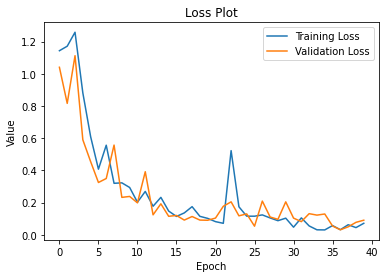

In [14]:
#loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

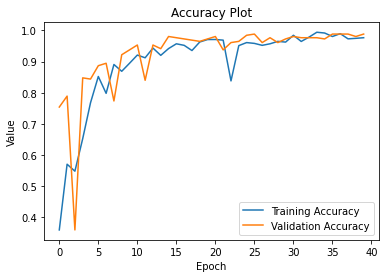

In [15]:
#accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Dari plot di atas, kita dapat simpulkan bahwa model goodfitting karena nilai dari loss dan accuracy validasi maupun training data tidak berpaut jauh satu sama lain.

Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z.png
0Ug54ifXRqqlZS2Z.png
scissors


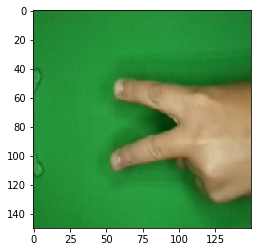

In [19]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')